In [1]:
from nufeb_tools import utils,plot
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks
from scipy.spatial.distance import pdist,squareform
from scipy.spatial import KDTree
from scipy.spatial import Voronoi, voronoi_plot_2d
from pathlib import Path
from tqdm import tqdm

In [2]:
BASE_DIR = Path(f'../simulation-data/spacing/')
folders = [path for path in BASE_DIR.iterdir() if path.is_dir()]
data = [utils.get_data(directory=str(x)) for x in folders]

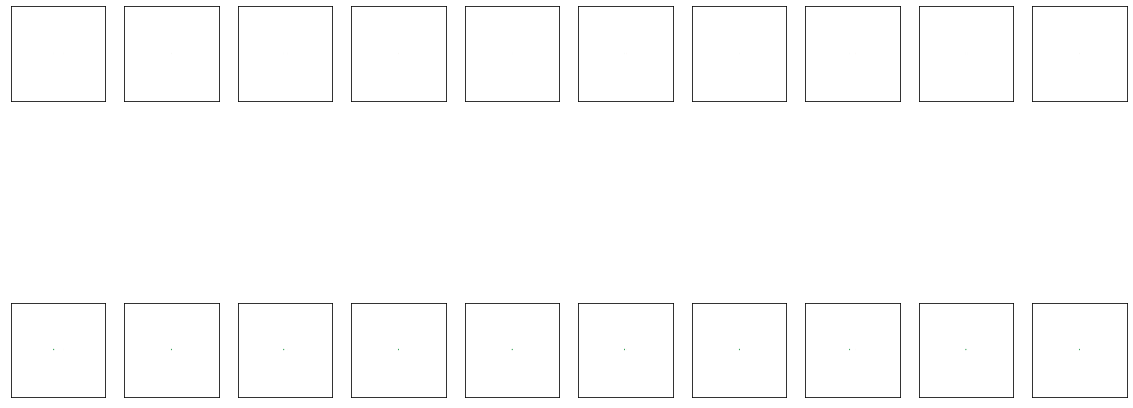

In [6]:
f,axes = plt.subplots(nrows=2,ncols=len(data),figsize=(20,10))
for ax, x in zip(axes.ravel()[:len(data)],data):
    plot.colony(x,0,by='Species',ax=ax)
for ax, x in zip(axes.ravel()[len(data):],data):
    plot.colony(x,35000,by='Species',ax=ax)
plt.show()
f.tight_layout()

In [7]:
plot.colony(x,35000,by='Species',ax=ax)


<AxesSubplot:>